In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import sys


P_PATH = os.getcwd()
print(os.listdir(P_PATH))

sys.path.append(P_PATH)

['results', 'tensorboard', 'src', 'README.md', 'models', '.gitignore', 'exploration.ipynb', '.git', 'playground.ipynb', 'data']


In [61]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import matplotlib.pyplot as plt
from src.data_loader import *

SCALEDOWN = 2
OBJ_NAME = 'chair'
BATCH_SIZE = 32
NUM_WORKERS = 4
img_size = int(800/SCALEDOWN)

transform = transforms.Compose([
    transforms.Resize((img_size, img_size))
])

min_max = None

#train dataset
train_dataset = SynDataset(obj_name=OBJ_NAME, root_dir=P_PATH, split="train", transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

min_max = train_dataset.min_max

#val dataset
val_dataset = SynDataset(obj_name=OBJ_NAME, root_dir=P_PATH, split="val", transform=transform, min_max=min_max)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

#test dataset
test_dataset = SynDataset(obj_name=OBJ_NAME, root_dir=P_PATH, split="test", transform=transform, min_max=min_max)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

print("train dataset size: ", len(train_dataset))
print("val dataset size: ", len(val_dataset))
print("test dataset size: ", len(test_dataset))

/home/shao-yu-huang/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


train dataset size:  100
val dataset size:  100
test dataset size:  200


sample image shape:  torch.Size([4, 400, 400])
sample scene_5d shape:  torch.Size([5])


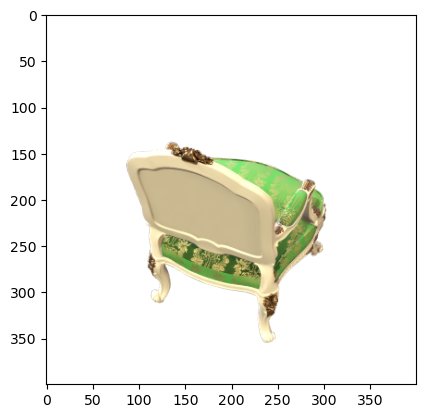

sample scene_5d:  tensor([-0.2613,  0.6910,  0.3541, -1.1811,  2.3797])


In [62]:
#print sample image and scene_5d from train dataset
sample = train_dataset[0]
print("sample image shape: ", sample['image'].shape)
print("sample scene_5d shape: ", sample['scene_5d'].shape)

fig = plt.figure()

plt.imshow(sample['image'].permute(1, 2, 0))
plt.show()

print("sample scene_5d: ", sample['scene_5d'])

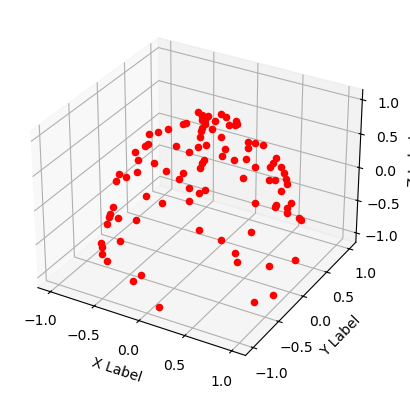

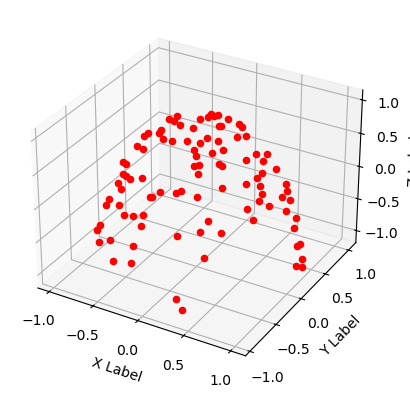

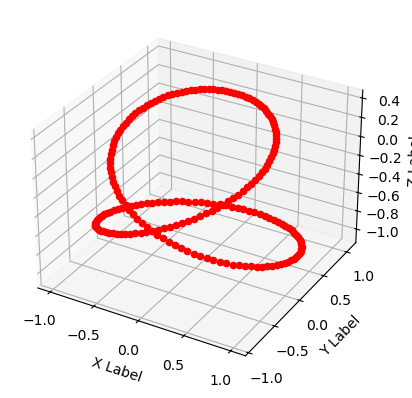

In [63]:
#plot the x, y, z in scene_5d for all images in train dataset, val dataset, test dataset respectively in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(train_dataset)):
    sample = train_dataset[i]
    ax.scatter(sample['scene_5d'][0], sample['scene_5d'][1], sample['scene_5d'][2], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(val_dataset)):
    sample = val_dataset[i]
    ax.scatter(sample['scene_5d'][0], sample['scene_5d'][1], sample['scene_5d'][2], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(test_dataset)):
    sample = test_dataset[i]
    ax.scatter(sample['scene_5d'][0], sample['scene_5d'][1], sample['scene_5d'][2], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
